# Advanced Regression - Assignment

In [2038]:
#importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
import os
from sklearn import metrics

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2039]:
#Reading the dataset
House = pd.read_csv("train.csv")

In [2040]:
#Summary of the dataset
print(House.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [2041]:
# head
House.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN   NaN         NaN        0       5    2007       WD        Normal     181500
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0    NaN   NaN         NaN        0       9    2008       WD        Normal     223500
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756   

# Understanding the Data 

The data dictionary contains the meaning of various attributes; some non-obvious ones are:

In [2042]:
#Understanding the count of records
House.shape

(1460, 81)

In [2043]:
#Understanding the columns
House.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  

In [2044]:
House.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000
mean    730.500000    56.897260    70.049958   10516.828082     6.099315     5.575342  1971.267808   1984.865753   103.685262   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575      6.517808     0.613014  1978.506164     1.767123   472.980137    94.244521    46.660274      21.954110     3.409589    15.060959     2.758904     43.489041     6.321918  2007.815753  180921.195890
std     421.610009    42.300571    24.284752    9981.264932     1.382997     1.112799    30.202904     20.645407   181.066207   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338      1.625393     0.644666    24.689725     0.747315   213.804841   125.338794    66.256028      61.119149    29.317331    55.757415    40.177307    496.123024     2.703626     1.328095   79442.502883
min       1.000000    20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000  2006.000000   34900.000000
25%     365.750000    20.000000    59.000000    7553.500000     5.000000     5.000000  1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000      0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1961.000000     1.000000   334.500000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000  2007.000000  129975.000000
50%     730.500000    50.000000    69.000000    9478.500000     6.000000     5.000000  1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  2008.000000  163000.000000
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000     6.000000  2000.000000   2004.000000   166.000000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000      0.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2002.000000     2.000000   576.000000   168.000000    68.000000       0.00000

# Data Cleaning

In [2045]:
# Remove duplicate rows in the Dataset
House = (House.drop_duplicates(['Id'], keep ='last'));

In [2046]:
# Remove columns which has only one unique Value
House = House.loc[:, (House != House.iloc[0]).any()] 

In [2047]:
#Remove columns which has NA values
House = House.dropna(axis=1,how='all')

In [2048]:
#Calculate the percentage of null values
round(100*(House.isnull().sum()/len(House.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

# Data Preparation

In [2049]:
# Removing column with high null percentage
House= House.drop(['LotFrontage',
                      'Alley', 
                      'FireplaceQu', 
                      'PoolQC', 
                      'Fence',
                      'MiscFeature'],axis = 1)
#Dropping ID colunm
House= House.drop(['Id'],axis = 1)

In [2050]:
#Imputing few Categorical Values to Numerical Values
#Providing Ranking like for Excellent - 1, Good - 2 and so on..

House["BsmtQual"]= House["BsmtQual"].replace({"Ex":"1", "Gd":"2" ,"TA":"3","Fa":"4","Po":"5"})
House["BsmtCond"]= House["BsmtCond"].replace({"Ex":"1", "Gd":"2" ,"TA":"3","Fa":"4","Po":"5"})
House["BsmtExposure"]= House["BsmtExposure"].replace({"Gd":"1", "Av":"2" ,"Mn":"3","No":"4"})
House["BsmtFinType1"]= House["BsmtFinType1"].replace({"GLQ":"1", "ALQ":"2" ,"BLQ":"3","Rec":"4","LwQ":"5","Unf":"6"})
House["BsmtFinType2"]= House["BsmtFinType1"].replace({"GLQ":"1", "ALQ":"2" ,"BLQ":"3","Rec":"4","LwQ":"5","Unf":"6"})


#### Handling the columns with Nan Values

In [2051]:
#Imputing the Nan Values with either 0 or None for Numerical and Categorical Variables respectively

cols=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
House[cols]=House[cols].fillna(0)

cols_Garage= ['GarageType', 'GarageFinish','GarageQual','GarageCond','GarageQual']
House[cols_Garage]=House[cols_Garage].fillna("NoGarage")

House['MasVnrType']=House['MasVnrType'].fillna("None")
House['MasVnrArea']=House['MasVnrArea'].fillna(0)
House['GarageYrBlt']=House['GarageYrBlt'].fillna(0)

House.dropna(subset=['Electrical'],inplace=True)


In [2052]:
#Converting the imputed Categorical values to integer

House['BsmtQual']=House.BsmtQual.astype('int64')
House['BsmtCond']=House.BsmtQual.astype('int64')
House['BsmtExposure']=House.BsmtQual.astype('int64')
House['BsmtFinType1']=House.BsmtQual.astype('int64')
House['BsmtFinType2']=House.BsmtQual.astype('int64')


In [2053]:
# all numeric (float and int) variables in the dataset
House_numeric = House.select_dtypes(include=['float64', 'int64'])
House_numeric.head()

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice
0          60     8450            7            5       2003          2003       196.0         2         2             2             2         706             2           0        150          856       856       854             0       1710             1             0         2         1             3             1             8           0       2003.0           2         548           0           61              0          0            0         0        0       2    2008     208500
1          20     9600            6            8       1976          1976         0.0         2         2             2             2         978             2           0        284         1262      1262         0             0       1262             0             1         2         0             3             1             6           1       1976.0           2         460         298            0              0          0            0         0        0       5    2007     181500
2          60    11250            7            5       2001          2002       162.0         2         2             2             2         486             2           0        434          920       920       866             0       1786             1             0         2         1             3             1             6           1       2001.0           2         608           0           42              0          0            0         0        0       9    2008     223500
3          70     9550            7            5       1915          1970         0.0         3         3             3             3         216             3           0        540          756       961       756             0       1717             1             0         1         0             3             1             7           1       1998.0           3         642           0           35            272          0            0         0        0       2    2006     140000
4          60    14260            8            5       2000          2000       350.0         2         2             2             2         655             2           0        490         1145      1145      1053             0       2198             1             0         2         1             4             1             9           1       2000.0           3         836         192           84              0          0            0         0        0      12    2008     250000

#### Outliers Treatment

In [2054]:
#Treating outliers in the data of BsmtFinSF1 and gdpp
# Above 95 percentile is treated with median 

MasVnrArea_percentile = np.percentile(House['MasVnrArea'],95)
BsmtFinSF1_percentile = np.percentile(House['BsmtFinSF1'],95)
median = House.loc[House['MasVnrArea'] < MasVnrArea_percentile, 'MasVnrArea'].median()
House['MasVnrArea'] = np.where(House['MasVnrArea'] > MasVnrArea_percentile, median,House['MasVnrArea'])
median = House.loc[House['BsmtFinSF1']<BsmtFinSF1_percentile, 'BsmtFinSF1'].median()
House['BsmtFinSF1'] = np.where(House['BsmtFinSF1'] >BsmtFinSF1_percentile, median,House['BsmtFinSF1'])


# Data Exploratory Analysis

In [2055]:
House.describe()

MSSubClass        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea     BsmtQual     BsmtCond  BsmtExposure  BsmtFinType1   BsmtFinSF1  BsmtFinType2   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  1459.000000    1459.000000  1459.000000  1459.000000  1459.000000   1459.000000  1459.000000  1459.000000  1459.000000   1459.000000   1459.000000  1459.000000   1459.000000  1459.000000  1459.000000  1459.000000  1459.000000  1459.000000   1459.000000  1459.000000   1459.000000   1459.000000  1459.000000  1459.000000   1459.000000   1459.000000   1459.000000  1459.000000  1459.000000  1459.000000  1459.000000  1459.000000  1459.000000    1459.000000  1459.000000  1459.000000  1459.000000   1459.000000  1459.000000  1459.000000    1459.000000
mean     56.881426   10517.363948     6.100069     5.575737  1971.244003   1984.850583    70.233036     2.359150     2.359150      2.359150      2.359150   386.419465      2.359150    46.581220   567.366004  1057.891021  1162.906785   346.791638      5.848526  1515.546950      0.425634      0.057574     1.564770     0.382454      2.866347      1.046607      6.517478     0.613434  1868.644962     1.766964   473.030158    94.240576    46.692255      21.969157     3.411926    15.071282     2.760795     43.518849     6.322824  2007.815627  180930.394791
std      42.310746    9984.666267     1.383171     1.113079    30.199555     20.644343   115.518254     0.772382     0.772382      0.772382      0.772382   365.560746      0.772382   161.369977   441.992392   438.500975   386.572089   436.610637     48.639512   525.650927      0.518969      0.238830     0.550987     0.502798      0.816050      0.220410      1.625902     0.644687   453.838403     0.747546   213.869604   125.381679    66.267472      61.137400    29.327247    55.775138    40.191018    496.291826     2.704331     1.328542   79468.964025
min      20.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000      0.000000      0.000000     0.000000      0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000  2006.000000   34900.000000
25%      20.000000    7549.000000     5.000000     5.000000  1954.000000   1967.000000     0.000000     2.000000     2.000000      2.000000      2.000000     0.000000      2.000000     0.000000   223.000000   796.000000   882.000000     0.000000      0.000000  1129.000000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1958.000000     1.000000   333.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000  2007.000000  129950.000000
50%      50.000000    9477.000000     6.000000     5.000000  1973.000000   1994.000000     0.000000     2.000000     2.000000      2.000000      2.000000   350.000000      2.000000     0.000000   479.000000   992.000000  1088.000000     0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1977.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  2008.000000  163000.000000
75%      70.000000   11603.000000     7.000000     6.000000  2000.000000   2004.000000   118.000000     3.000000    

In [2056]:
# correlation matrix
cor = House_numeric.corr()
cor

MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal    MoSold    YrSold  SalePrice
MSSubClass       1.000000 -0.139766     0.032936    -0.059134   0.027435      0.040199    0.023792 -0.076727 -0.076727     -0.076727     -0.076727   -0.069501     -0.076727   -0.065549  -0.140627    -0.238160 -0.251484  0.307713      0.046524   0.074949      0.003799     -0.002243  0.131354  0.177004     -0.023502      0.281833      0.040274   -0.045232    -0.081122   -0.040232   -0.098558   -0.012598    -0.005838      -0.011904  -0.043786    -0.025932  0.008309 -0.007651 -0.013404 -0.021461  -0.084230
LotArea         -0.139766  1.000000     0.105786    -0.005665   0.014296      0.013852    0.103302 -0.058029 -0.058029     -0.058029     -0.058029    0.214121     -0.058029    0.111158  -0.002641     0.260962  0.299533  0.051030      0.004773   0.263109      0.158147      0.048034  0.126100  0.014333      0.119700     -0.017796      0.190037    0.271398     0.072618    0.154893    0.180392    0.171701     0.084751      -0.018360   0.020417     0.043147  0.077669  0.038063  0.001179 -0.014254   0.263837
OverallQual      0.032936  0.105786     1.000000    -0.092243   0.573334      0.551605    0.407075 -0.458025 -0.458025     -0.458025     -0.458025    0.239265     -0.458025   -0.059291   0.308018     0.537523  0.475933  0.295969     -0.030502   0.593021      0.110700     -0.040291  0.551267  0.274328      0.101789     -0.184040      0.427720    0.396455     0.289236    0.600991    0.561980    0.239000     0.308554      -0.114162   0.030314     0.064755  0.065143 -0.031461  0.070570 -0.027277   0.791069
OverallCond     -0.059134 -0.005665    -0.092243     1.000000  -0.375780      0.074158   -0.125922  0.289048  0.289048      0.289048      0.289048   -0.046595      0.289048    0.040132  -0.137008    -0.171796 -0.144646  0.029187      0.025454  -0.079777     -0.055250      0.117749 -0.193929 -0.060371      0.013039     -0.087085     -0.057485   -0.024167    -0.006408   -0.185670   -0.151662   -0.003318    -0.032847       0.070238   0.025465     0.054721 -0.002009  0.068752 -0.003685  0.044003  -0.077924
YearBuilt        0.027435  0.014296     0.573334    -0.375780   1.000000      0.592512    0.312227 -0.588257 -0.588257     -0.588257     -0.588257    0.250465     -0.588257   -0.048903   0.149444     0.393159  0.283056  0.009784     -0.183774   0.199286      0.188374     -0.037990  0.467960  0.241923     -0.070813     -0.174715      0.095401    0.148580     0.271921    0.537866    0.479460    0.224946     0.189359      -0.387177   0.031461    -0.050175  0.005006 -0.034330  0.012791 -0.013733   0.523273
YearRemodAdd     0.040199  0.013852     0.551605     0.074158   0.592512      1.000000    0.177038 -0.417007 -0.417007     -0.417007     -0.417007    0.129259     -0.417007   -0.067575   0.181520     0.292546  0.241344  0.139607     -0.062356   0.287677      0.120148     -0.012165  0.438733  0.182595     -0.040718     -0.149503      0.191603    0.113360     0.146195    0.420573    0.372012    0.205773     0.226944      -0.193740   0.045389    -0.038558  0.005882 -0.010226  0.021860  0.035656   0.507430
MasVnrArea       0.023792  0.103302     0.407075    -0.125922   0.312227      0.177038    1.000000 -0.242051 -0.242051     -0.242051     -0.242051    0.260989     -0.242051   -0.071453   0.113719     0.359798  0.339605  0.174109     -0.068683   0.388012      0.082718      0.027312  0.273397  0.199713      0.102851     -0.038538      0.279724    0.246747     0.132835    0.362119    0.370807    0.160026     0.122287      -0.110065   0.019100     0.062151  0

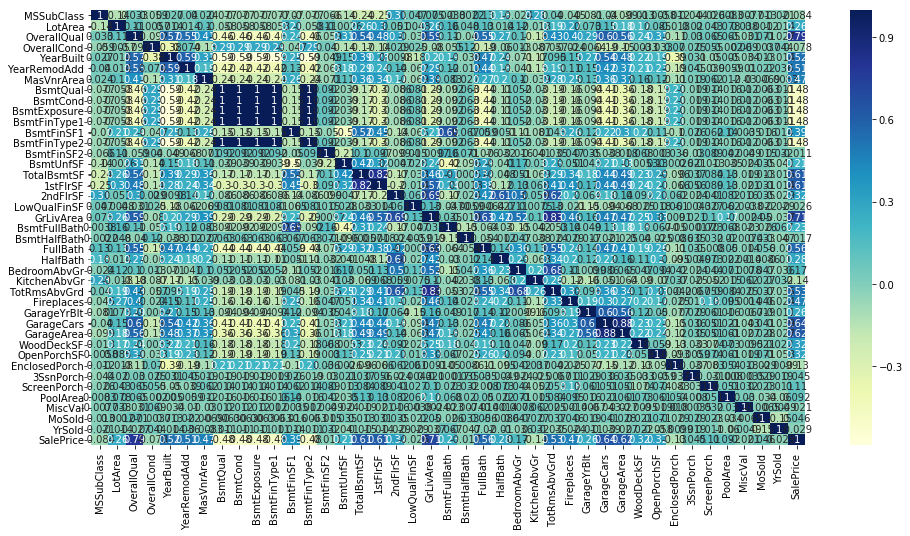

In [1959]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

#### Analysing the SalePrice with other numeric Variables

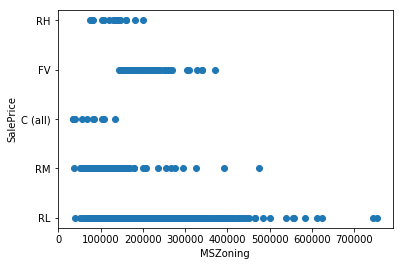

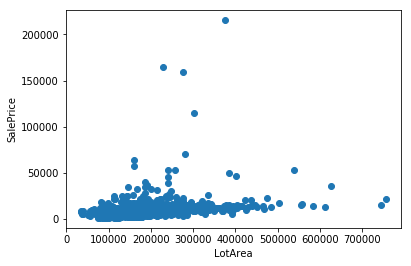

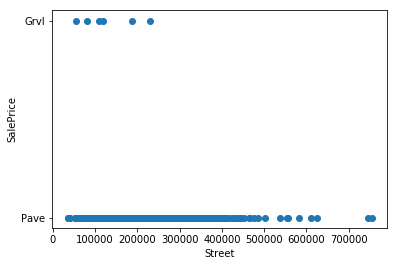

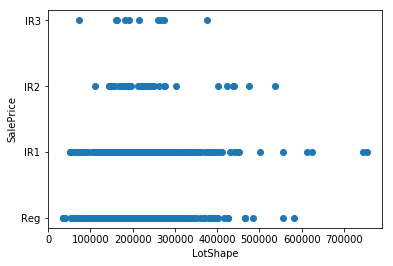

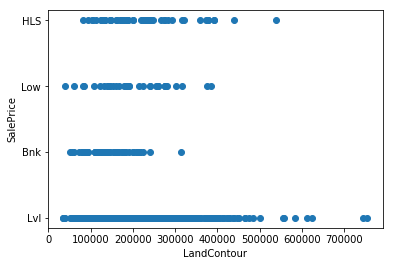

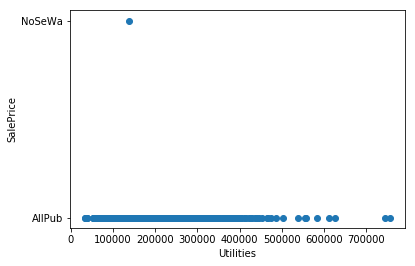

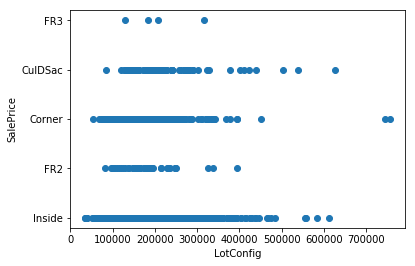

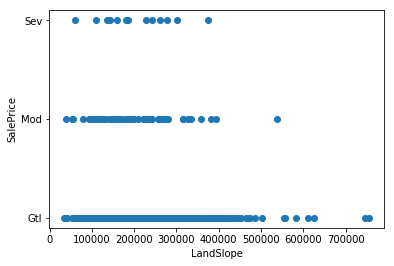

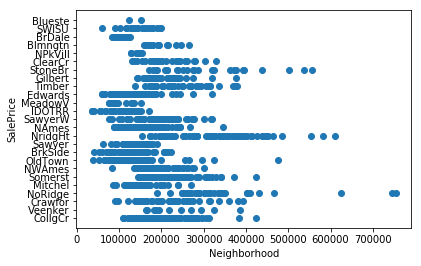

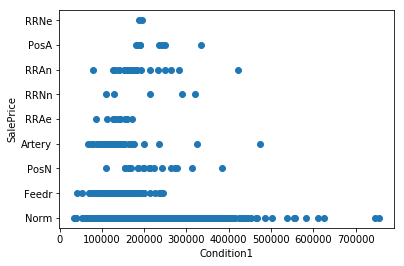

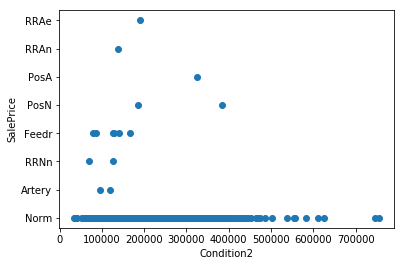

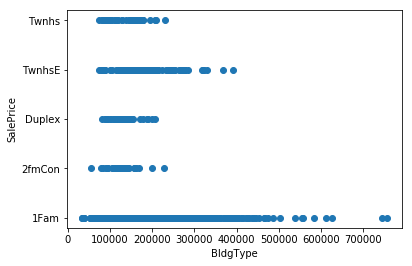

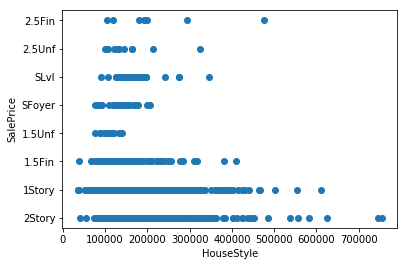

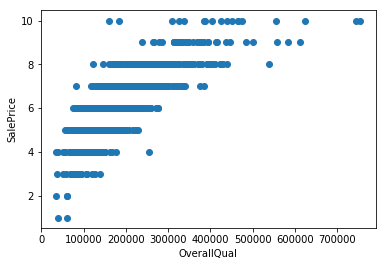

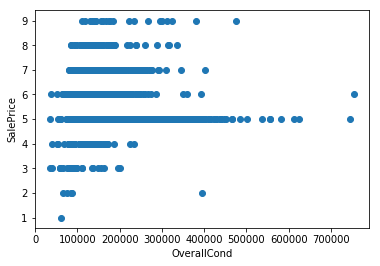

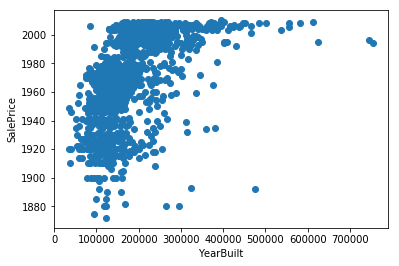

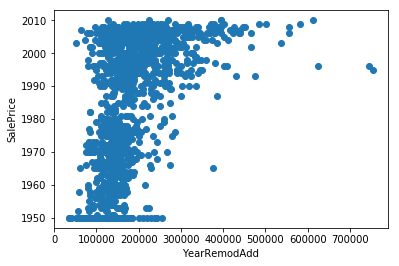

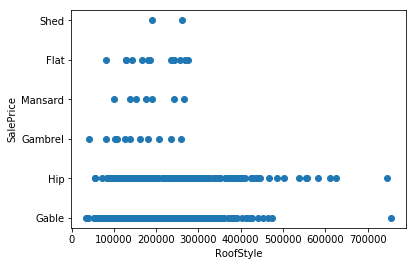

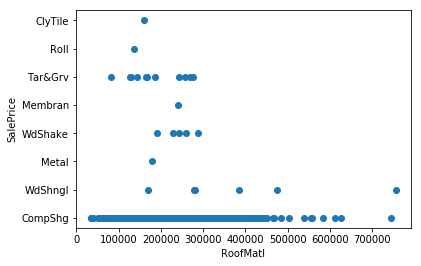

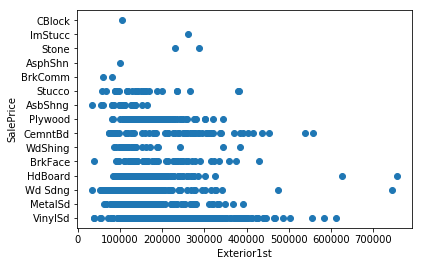

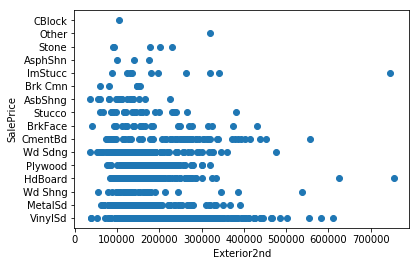

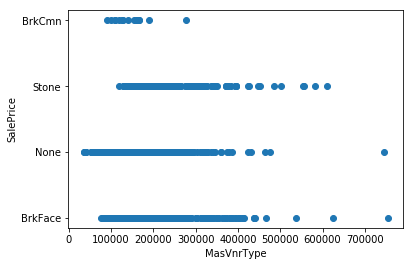

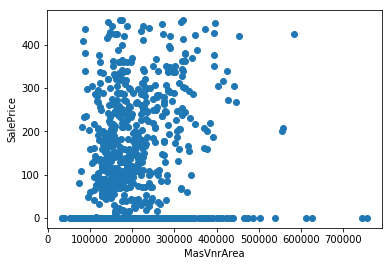

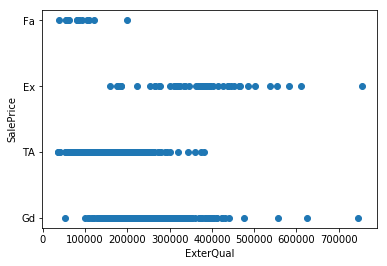

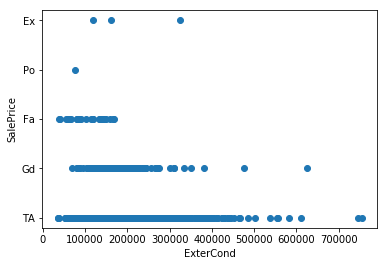

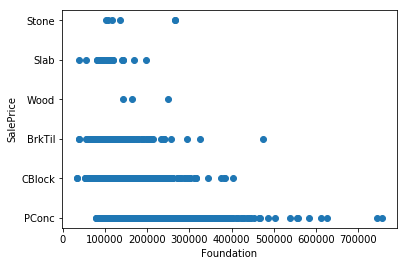

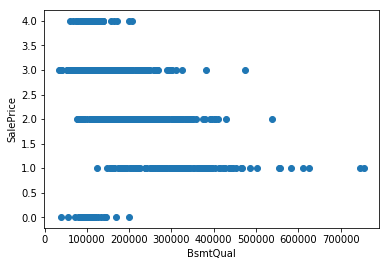

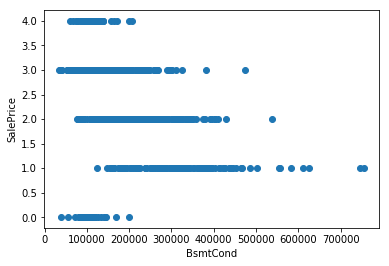

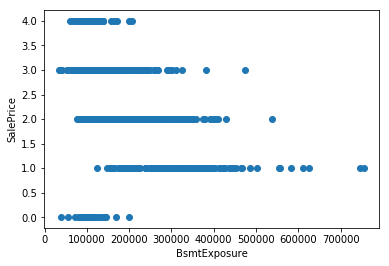

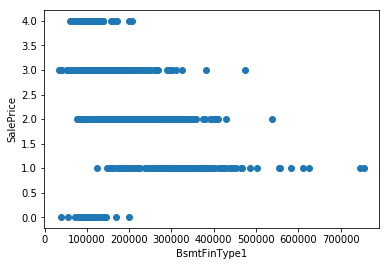

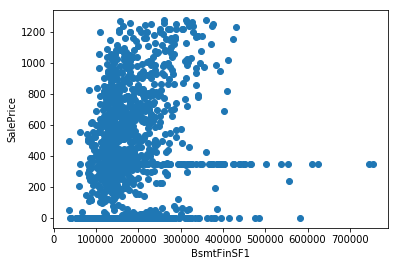

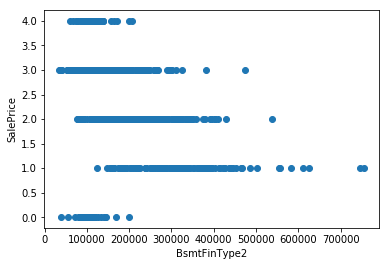

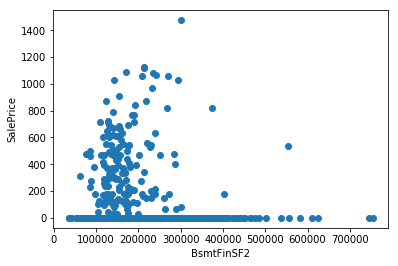

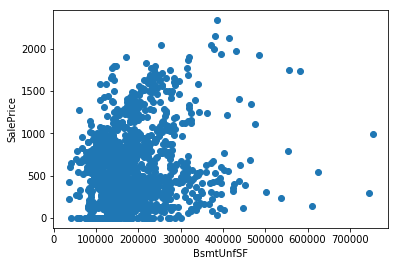

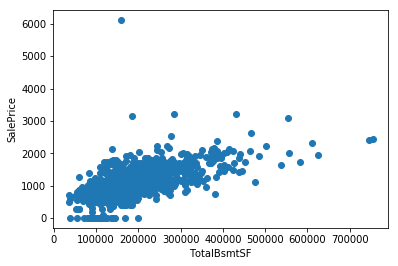

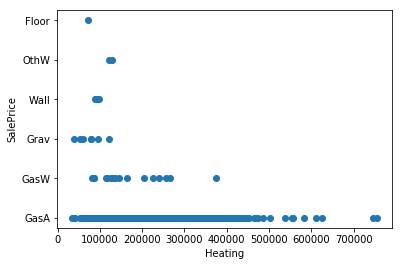

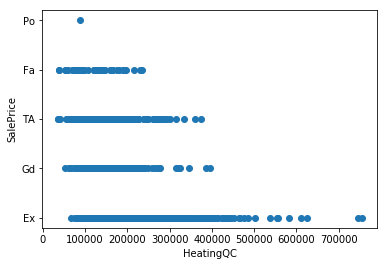

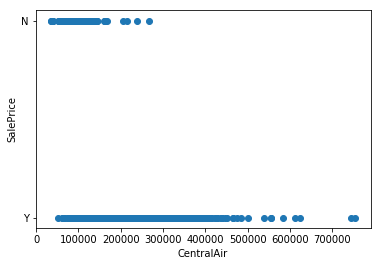

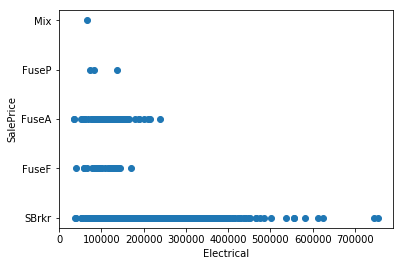

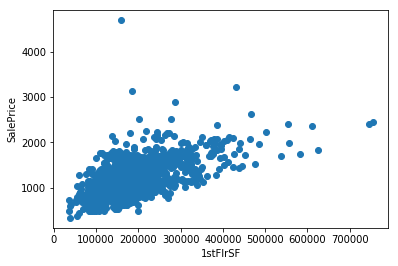

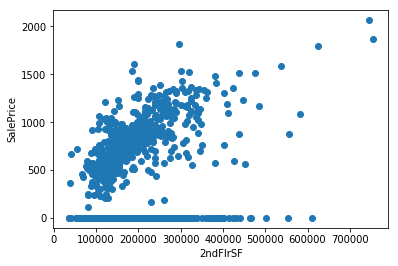

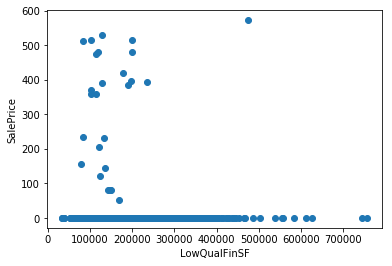

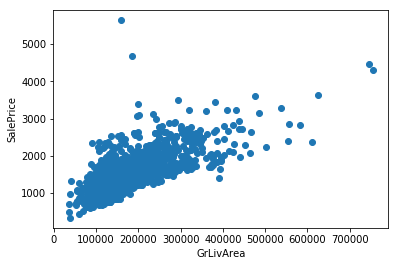

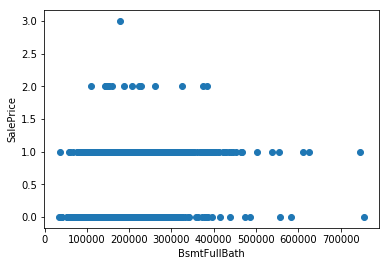

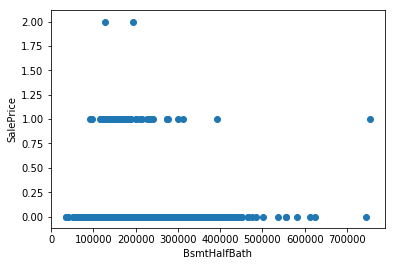

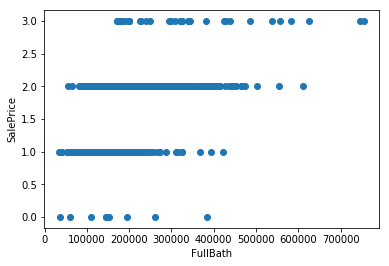

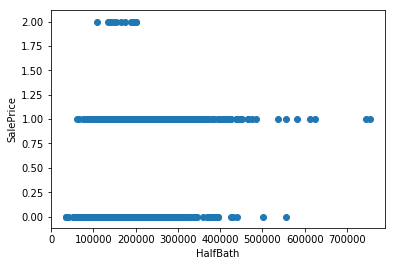

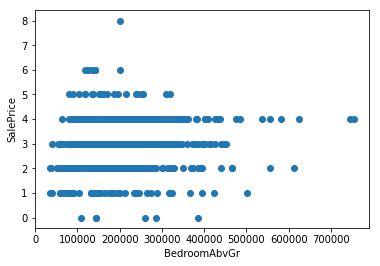

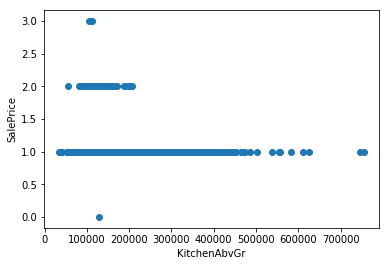

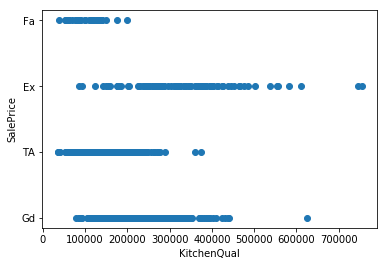

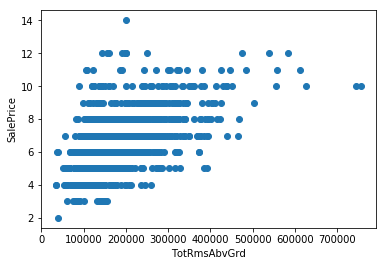

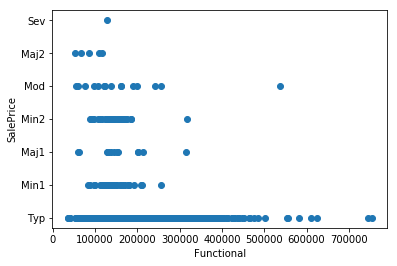

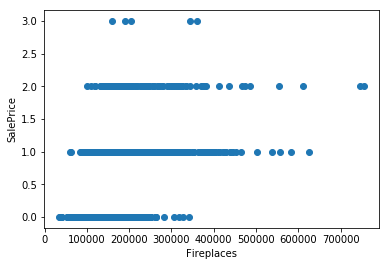

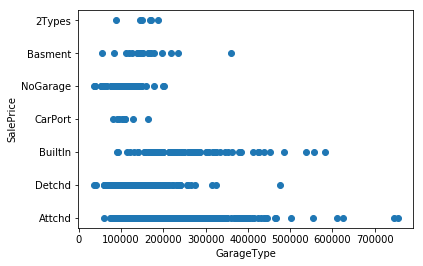

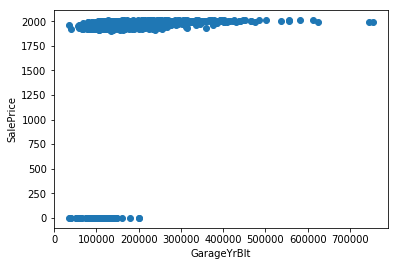

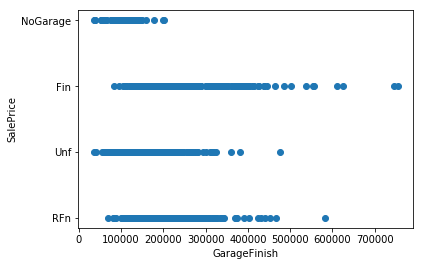

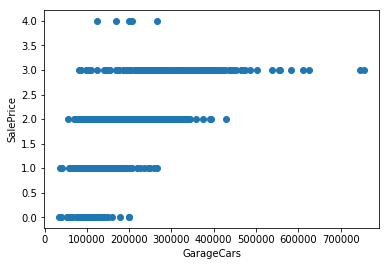

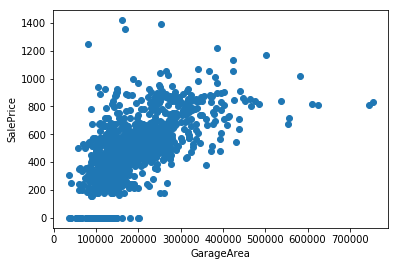

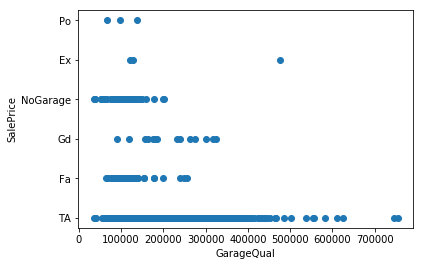

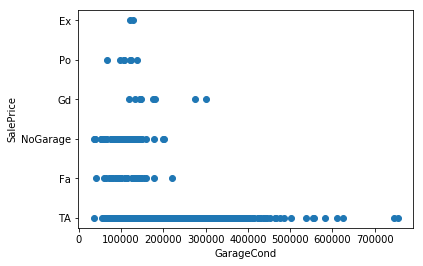

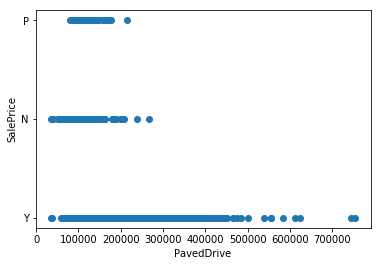

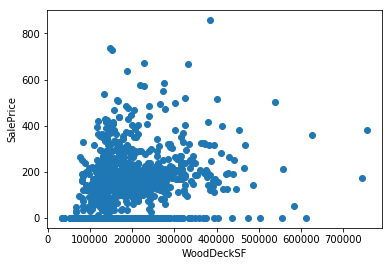

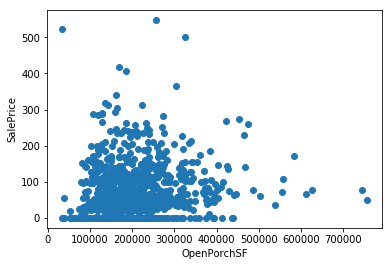

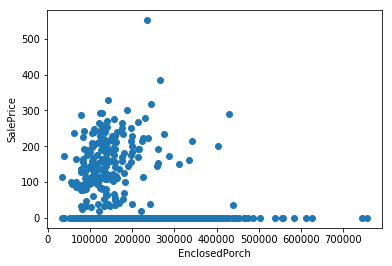

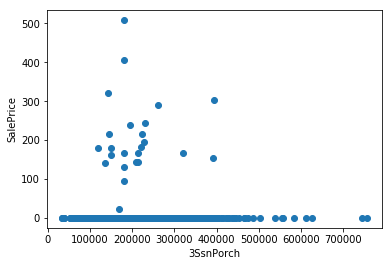

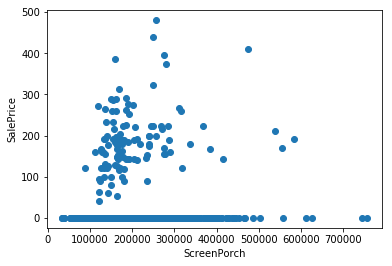

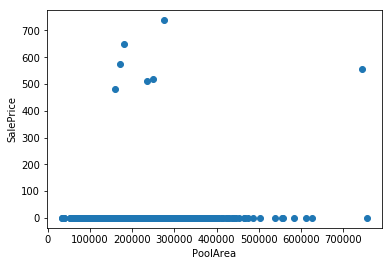

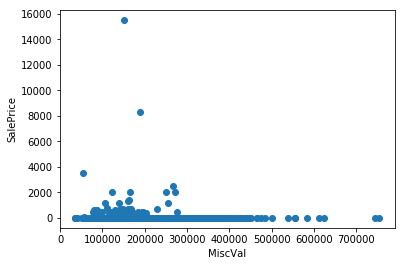

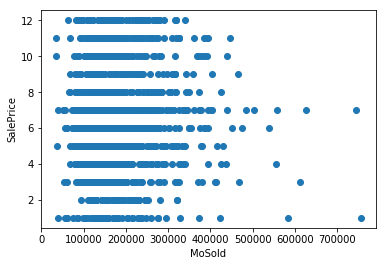

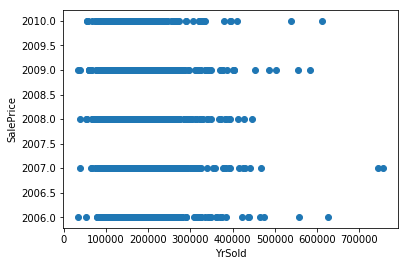

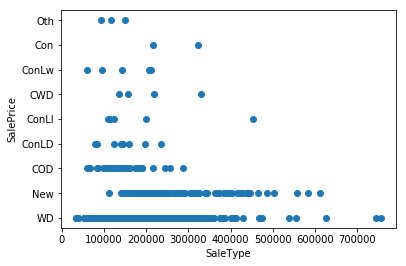

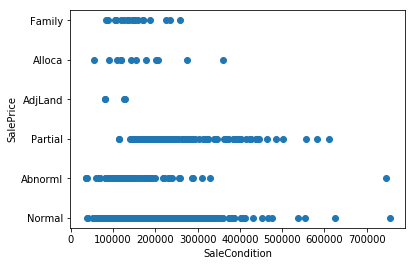

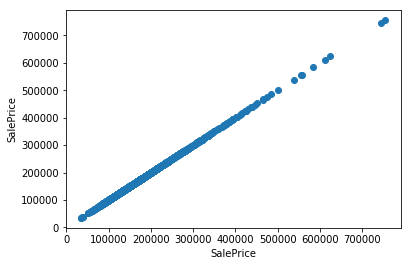

In [1960]:
plt.figure()
for col in range(1, House.shape[1]):
    plt.scatter(House["SalePrice"], House.iloc[:, col])
    plt.xlabel(House.columns[col])
    plt.ylabel("SalePrice")
    plt.show()

#### Analysing the SalePrice with other Categorical Variables

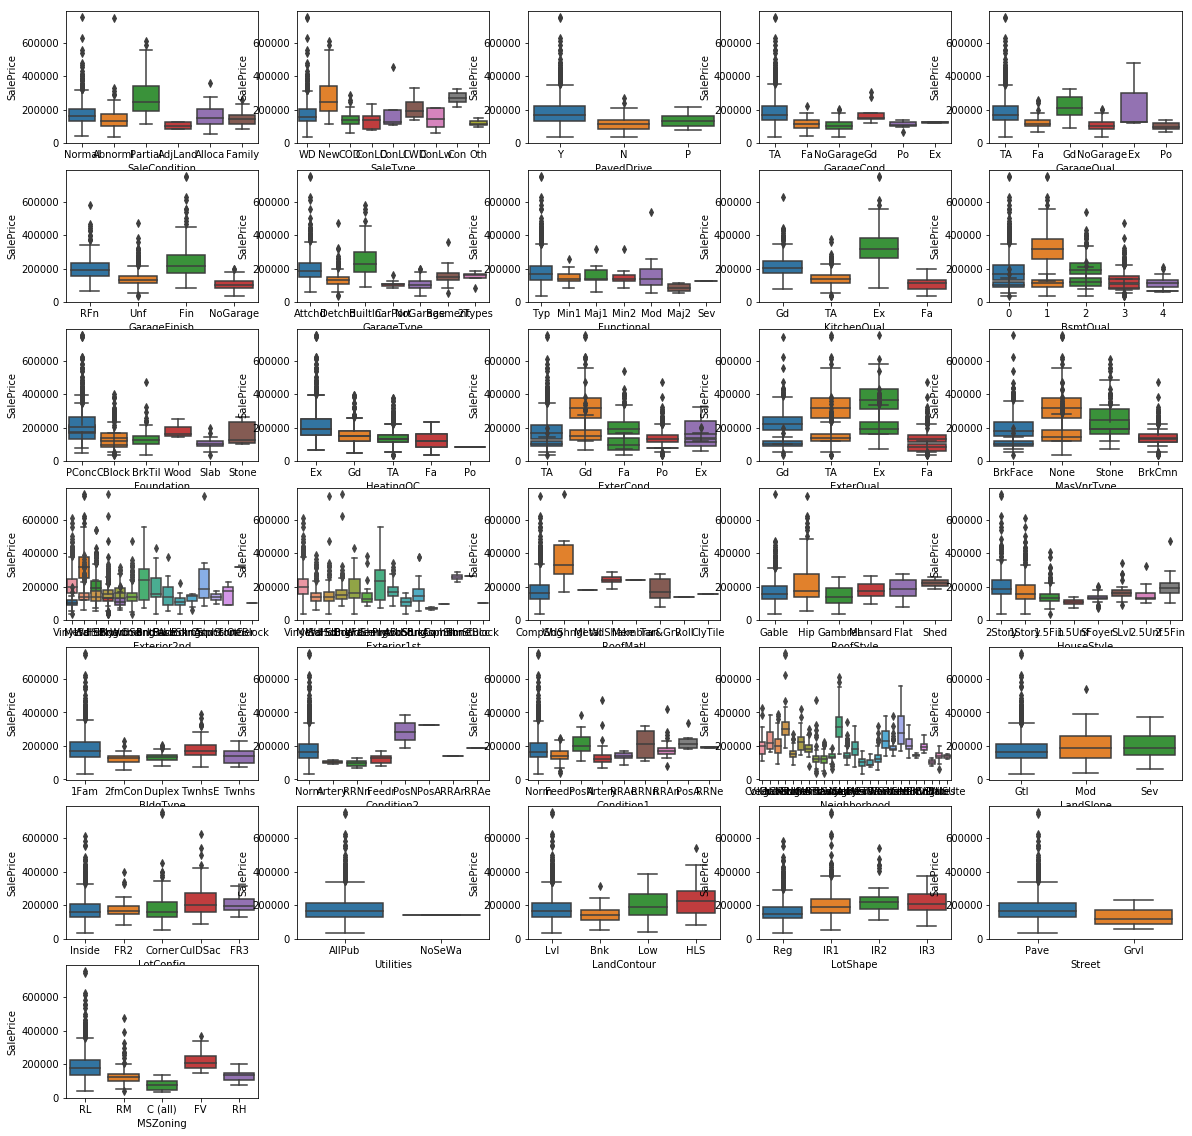

In [1961]:
plt.figure(figsize=(20,20))
plt.subplot(7,5,1)
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = House)
plt.subplot(7,5,2)
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = House)
plt.subplot(7,5,3)
sns.boxplot(x = 'PavedDrive', y = 'SalePrice', data = House)
plt.subplot(7,5,4)
sns.boxplot(x = 'GarageCond', y = 'SalePrice', data = House)
plt.subplot(7,5,5)
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = House)
plt.subplot(7,5,6)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = House)
plt.subplot(7,5,7)
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = House)
plt.subplot(7,5,8)
sns.boxplot(x = 'Functional', y = 'SalePrice', data = House)
plt.subplot(7,5,9)
sns.boxplot(x = 'KitchenQual', y = 'SalePrice', data = House)
plt.subplot(7,5,10)
sns.boxplot(x = 'Electrical', y = 'SalePrice', data = House)
plt.subplot(7,5,11)
sns.boxplot(x = 'CentralAir', y = 'SalePrice', data = House)
plt.subplot(7,5,12)
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', data = House)
plt.subplot(7,5,13)
sns.boxplot(x = 'BsmtFinType2', y = 'SalePrice', data = House)
plt.subplot(7,5,14)
sns.boxplot(x = 'BsmtFinType1', y = 'SalePrice', data = House)
plt.subplot(7,5,15)
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = House)
plt.subplot(7,5,16)
sns.boxplot(x = 'BsmtCond', y = 'SalePrice', data = House)
plt.subplot(7,5,10)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = House)
plt.subplot(7,5,11)
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = House)
plt.subplot(7,5,12)
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', data = House)
plt.subplot(7,5,13)
sns.boxplot(x = 'ExterCond', y = 'SalePrice', data = House)
plt.subplot(7,5,14)
sns.boxplot(x = 'ExterQual', y = 'SalePrice', data = House)
plt.subplot(7,5,15)
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = House)
plt.subplot(7,5,16)
sns.boxplot(x = 'Exterior2nd', y = 'SalePrice', data = House)
plt.subplot(7,5,17)
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = House)
plt.subplot(7,5,18)
sns.boxplot(x = 'RoofMatl', y = 'SalePrice', data = House)
plt.subplot(7,5,19)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = House)
plt.subplot(7,5,20)
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = House)
plt.subplot(7,5,21)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = House)
plt.subplot(7,5,22)
sns.boxplot(x = 'Condition2', y = 'SalePrice', data = House)
plt.subplot(7,5,23)
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = House)
plt.subplot(7,5,24)
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = House)
plt.subplot(7,5,25)
sns.boxplot(x = 'LandSlope', y = 'SalePrice', data = House)
plt.subplot(7,5,26)
sns.boxplot(x = 'LotConfig', y = 'SalePrice', data = House)
plt.subplot(7,5,27)
sns.boxplot(x = 'Utilities', y = 'SalePrice', data = House)
plt.subplot(7,5,28)
sns.boxplot(x = 'LandContour', y = 'SalePrice', data = House)
plt.subplot(7,5,29)
sns.boxplot(x = 'LotShape', y = 'SalePrice', data = House)
plt.subplot(7,5,30)
sns.boxplot(x = 'Street', y = 'SalePrice', data = House)
plt.subplot(7,5,31)
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = House)



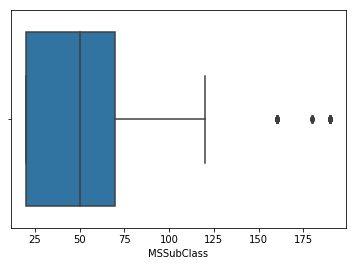

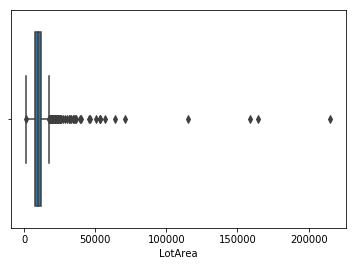

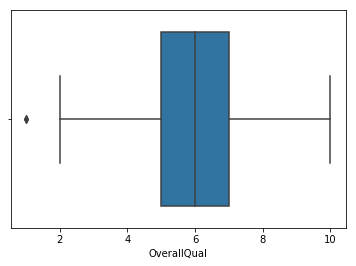

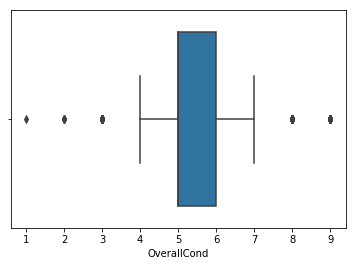

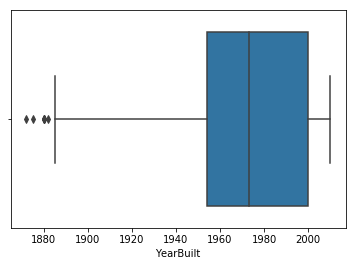

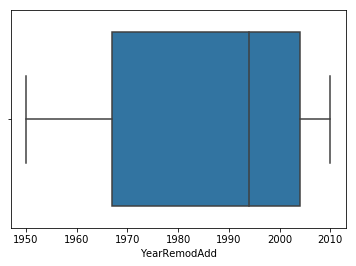

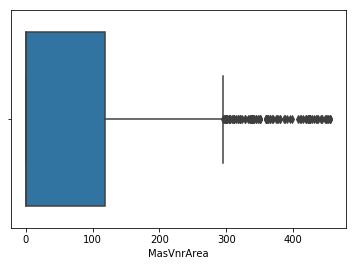

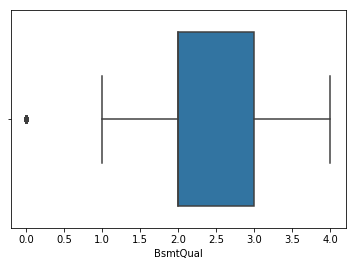

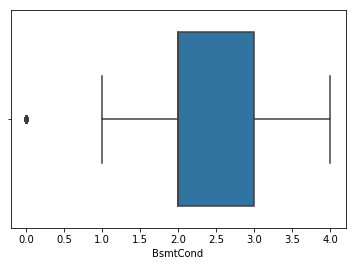

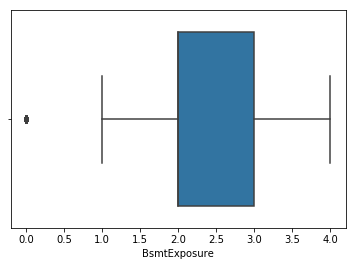

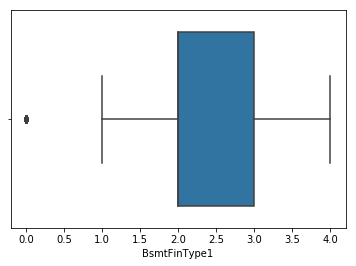

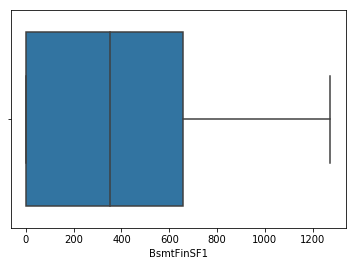

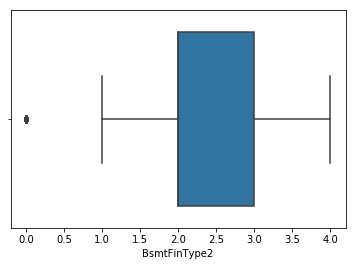

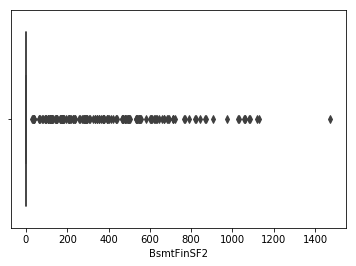

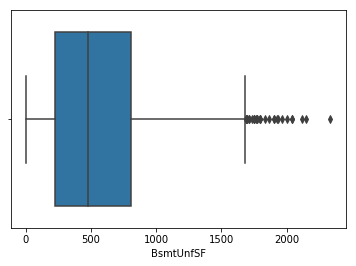

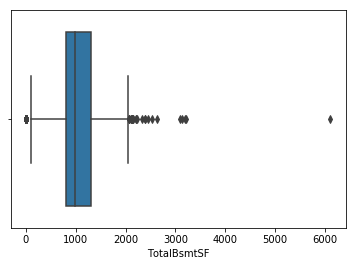

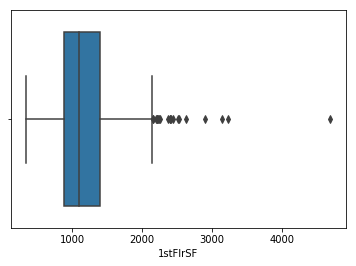

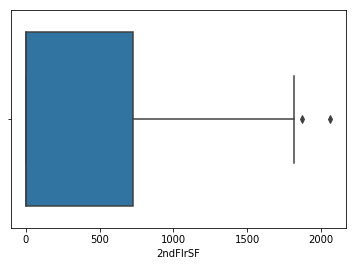

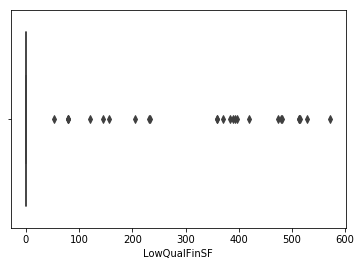

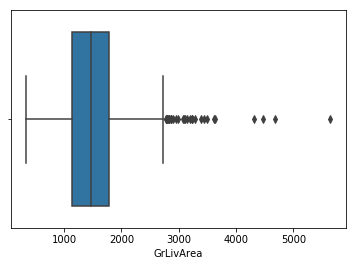

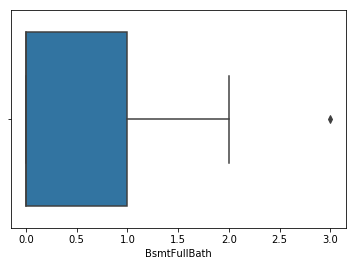

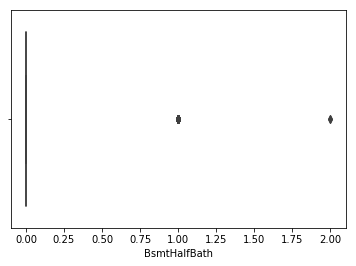

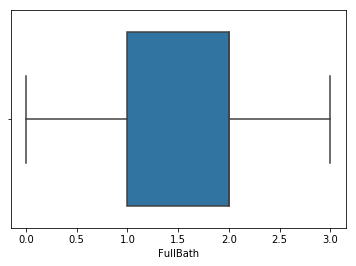

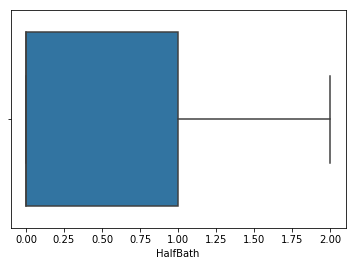

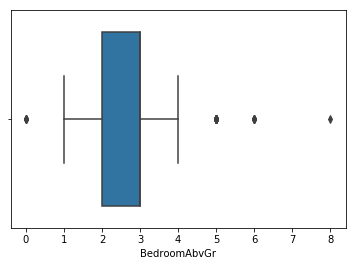

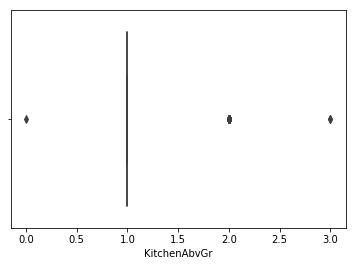

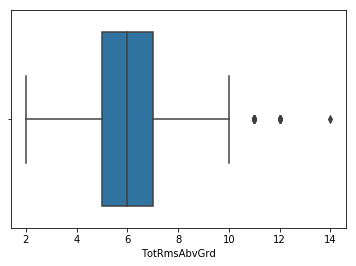

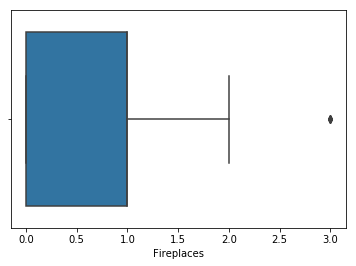

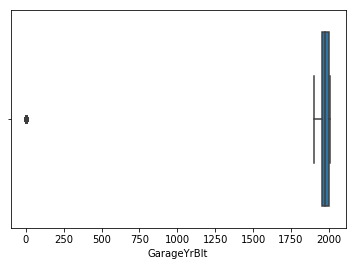

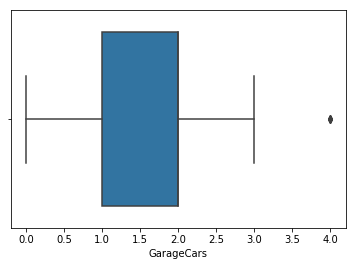

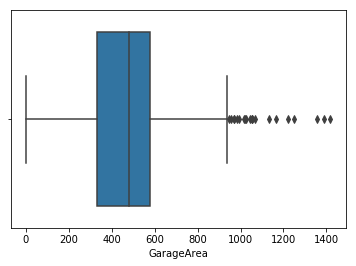

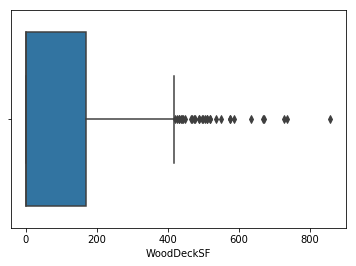

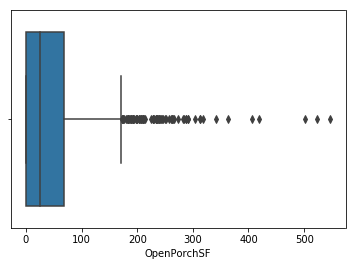

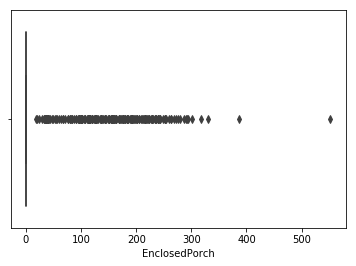

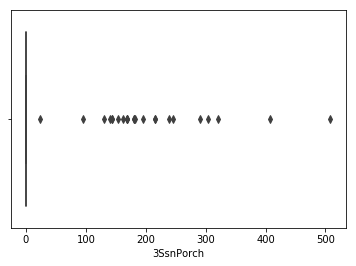

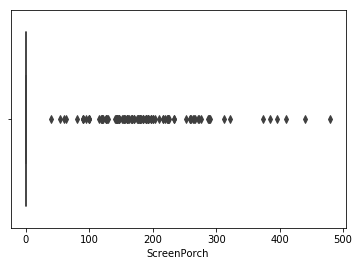

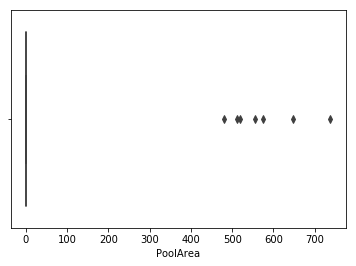

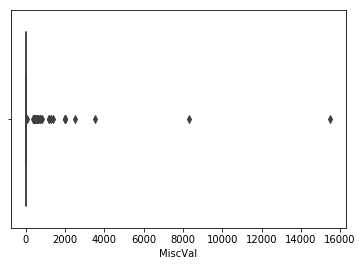

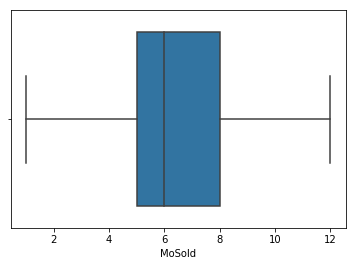

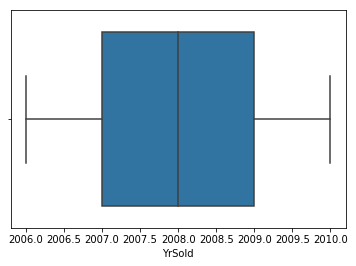

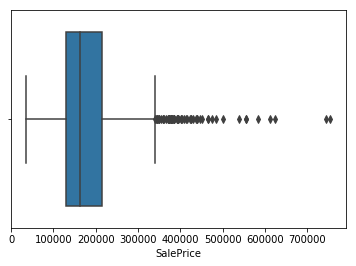

In [1962]:
#Checking for outliers in the data
House_numeric = House.select_dtypes(include=['float64', 'int64'])
for col in  House_numeric:
    sns.boxplot(House_numeric [col])
    plt.show()

## Model building and evaluation

### Feature Scaling

In [2057]:
# scaling the features

House_numeric = ['MSSubClass','LotArea','OverallQual','OverallCond','MasVnrArea','BsmtFinSF1',
'BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF',
'GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
'TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','MiscVal','BsmtQual','BsmtCond',
                 'BsmtExposure','BsmtFinType1','BsmtFinType2']

# Applying scaler() to all the columns except "SalePrice" column
House[House_numeric] = StandardScaler().fit_transform(House[House_numeric])


In [2058]:
# split into X and y
#y = House['SalePrice']
y = np.log(House.SalePrice)
X = House.drop(['SalePrice'], axis=1)

### Dummy Variable Creation 

In [2059]:
# creating dummy variables for categorical variables
# subset all categorical variables
House_categorical = X.select_dtypes(include=['object'])
House_categorical.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation Heating HeatingQC CentralAir Electrical KitchenQual Functional GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType SaleCondition
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc    GasA        Ex          Y      SBrkr          Gd        Typ     Attchd          RFn         TA         TA          Y       WD        Normal
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg     MetalSd     MetalSd       None        TA        TA     CBlock    GasA        Ex          Y      SBrkr          TA        Typ     Attchd          RFn         TA         TA          Y       WD        Normal
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc    GasA        Ex          Y      SBrkr          Gd        Typ     Attchd          RFn         TA         TA          Y       WD        Normal
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg     Wd Sdng     Wd Shng       None        TA        TA     BrkTil    GasA        Gd          Y      SBrkr          Gd        Typ     Detchd          Unf         TA         TA          Y       WD       Abnorml
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc    GasA        Ex          Y      SBrkr          Gd        Typ     Attchd          RFn         TA         TA          Y       WD        Normal

In [2060]:
# convert into dummies
House_dummies = pd.get_dummies(House_categorical, drop_first=True)
House_dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_Somerst  Neighborhood_StoneBr  Neighborhood_Timber  Neighborhood_Veenker  Condition1_Feedr  Condition1_Norm  Condition1_PosA  Condition1_PosN  Condition1_RRAe  Condition1_RRAn  Condition1_RRNe  Condition1_RRNn  Condition2_Feedr  Condition2_Norm  Condition2_PosA  \
0            0            0            1            0            1             0             0             1                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0                    0                     0                     0                     0                    0                     0                 0                1                0                0                0                0                0                0                 0                1                0   
1            0            0            1            0            1             0             0             1                0                0                1                 0                  0              1              0                 0              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0                    0                     0                     0                     0                    0                     1                 1                0                0                0                0                0                0                0                 0                1                0   
2            0            0            1            0            1             0             0             0                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0                    0                     0                     0                     0                    0                     0                 0                1                0                0                0                0                0                0                 0                1                0   
3            0            0            1            0      

In [2061]:
# drop categorical variables 
X = X.drop(list(House_categorical.columns), axis=1)

In [2062]:
# concat dummy variables with X
X = pd.concat([X, House_dummies], axis=1)

### Dividing Dataset into Train and Test Dataset

In [2063]:
# split into train and test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

#  Linear Regression

In [2064]:
# linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)


0.9489624032975437

In [2065]:
# Prediction on Test Data
lm = LinearRegression()
lm.fit(X_test, y_test)
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

0.9567276465260253

In [2066]:
#RMSE Error Calculation

from sklearn.metrics import mean_squared_error
predictions = model.predict(X_test)
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.014977350410703933


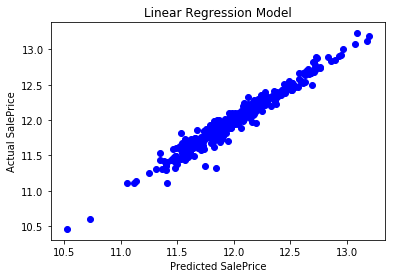

In [2067]:
#Plot for Actual Price and Predicted Price 
actual_values = y_test
plt.scatter(y_test_pred, actual_values, alpha=1,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')
plt.title('Linear Regression Model')
plt.show()

####                        Accuracy the R2 value with linear regression without any feature removal  has
#####                         Train R2- 0.94896240
#####                         Test R2 - 0.95672764


# RFE
#### To eliminate the number of features before performing regression

In [2068]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2069]:
# Running RFE with the output number of the variable equal to 100
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 100)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [2070]:
# Displaying the ranking for selected columns
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 12),
 ('LotArea', False, 50),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', False, 104),
 ('YearRemodAdd', False, 110),
 ('MasVnrArea', False, 102),
 ('BsmtQual', False, 114),
 ('BsmtCond', False, 112),
 ('BsmtExposure', False, 106),
 ('BsmtFinType1', True, 1),
 ('BsmtFinSF1', False, 75),
 ('BsmtFinType2', True, 1),
 ('BsmtFinSF2', False, 73),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', False, 81),
 ('2ndFlrSF', False, 80),
 ('LowQualFinSF', False, 108),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 55),
 ('BsmtHalfBath', False, 92),
 ('FullBath', False, 64),
 ('HalfBath', False, 65),
 ('BedroomAbvGr', False, 113),
 ('KitchenAbvGr', False, 63),
 ('TotRmsAbvGrd', False, 85),
 ('Fireplaces', False, 56),
 ('GarageYrBlt', False, 53),
 ('GarageCars', True, 1),
 ('GarageArea', False, 23),
 ('WoodDeckSF', False, 71),
 ('OpenPorchSF', False, 82),
 ('EnclosedPorch', False, 90),
 ('3SsnPorch', False, 86),
 ('ScreenPorch', Fa

In [2071]:
# Display of selected columns
pd.set_option('display.max_columns', None)
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'OverallCond', 'BsmtFinType1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'GarageCars', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'LotShape_IR3', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_NAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRNn', 'HouseStyle_1.5Unf', 'HouseStyle_2.5Fin', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_HdBoard',
   

##### Selected 100 features
###### OverallQual', 'OverallCond', 'BsmtFinType1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'GarageCars', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'LotShape_IR3', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_NAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRNn', 'HouseStyle_1.5Unf', 'HouseStyle_2.5Fin', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_HdBoard','Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stucco', 'Exterior1st_WdShing', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'ExterCond_Fa', 'Foundation_PConc', 'Foundation_Wood', 'Heating_GasA', 'Heating_GasW', 'Heating_OthW', 'Heating_Wall', 'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_Po', 'HeatingQC_TA', 'CentralAir_Y', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Maj2', 'Functional_Min1', 'Functional_Sev', 'Functional_Typ', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_NoGarage', 'GarageFinish_NoGarage', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_NoGarage', 'GarageQual_Po', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_NoGarage', 'GarageCond_Po', 'GarageCond_TA', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_New', 'SaleCondition_AdjLand', 'SaleCondition_Normal', 'SaleCondition_Partial


In [2072]:
# Assigning 100 selected features to X_train

X_train= X_train[['OverallQual', 'OverallCond', 'BsmtFinType1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea',
                  'GarageCars', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'LotShape_IR3', 'LandContour_HLS', 
                  'LandContour_Low', 'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_FR2', 'LotConfig_FR3',
                  'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 
                  'Neighborhood_MeadowV', 'Neighborhood_NAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
                  'Neighborhood_OldTown', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition1_Norm', 
                  'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_Norm', 
                  'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRNn', 'HouseStyle_1.5Unf', 'HouseStyle_2.5Fin',
                  'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 
                  'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 
                  'Exterior1st_CBlock', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 
                  'Exterior1st_Stucco', 'Exterior1st_WdShing', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 
                  'Exterior2nd_CmentBd', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'ExterCond_Fa', 'Foundation_PConc',
                  'Foundation_Wood', 'Heating_GasA', 'Heating_GasW', 'Heating_OthW', 'Heating_Wall', 'HeatingQC_Fa',
                  'HeatingQC_Gd', 'HeatingQC_Po', 'HeatingQC_TA', 'CentralAir_Y', 'KitchenQual_Fa', 'KitchenQual_Gd',
                  'KitchenQual_TA', 'Functional_Maj2', 'Functional_Min1', 'Functional_Sev', 'Functional_Typ', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_NoGarage', 'GarageFinish_NoGarage', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_NoGarage', 'GarageQual_Po', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_NoGarage', 'GarageCond_Po', 'GarageCond_TA', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_New', 'SaleCondition_AdjLand', 'SaleCondition_Normal', 'SaleCondition_Partial']]



In [2073]:
# Assigning 100 selected features to X

X= X[['OverallQual', 'OverallCond', 'BsmtFinType1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea',
                  'GarageCars', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'LotShape_IR3', 'LandContour_HLS', 
                  'LandContour_Low', 'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_FR2', 'LotConfig_FR3',
                  'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 
                  'Neighborhood_MeadowV', 'Neighborhood_NAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
                  'Neighborhood_OldTown', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition1_Norm', 
                  'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_Norm', 
                  'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRNn', 'HouseStyle_1.5Unf', 'HouseStyle_2.5Fin',
                  'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 
                  'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 
                  'Exterior1st_CBlock', 'Exterior1st_HdBoard',
                  'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stucco', 'Exterior1st_WdShing', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'ExterCond_Fa', 'Foundation_PConc', 'Foundation_Wood', 'Heating_GasA', 'Heating_GasW', 'Heating_OthW', 'Heating_Wall', 'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_Po', 'HeatingQC_TA', 'CentralAir_Y', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Maj2', 'Functional_Min1', 'Functional_Sev', 'Functional_Typ', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_NoGarage', 'GarageFinish_NoGarage', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_NoGarage', 'GarageQual_Po', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_NoGarage', 'GarageCond_Po', 'GarageCond_TA', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_New', 'SaleCondition_AdjLand', 'SaleCondition_Normal', 'SaleCondition_Partial']]



In [2074]:
# Assigning 100 selected features to X_test

X_test= X_test[['OverallQual', 'OverallCond', 'BsmtFinType1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea',
                  'GarageCars', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'LotShape_IR3', 'LandContour_HLS', 
                  'LandContour_Low', 'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_FR2', 'LotConfig_FR3',
                  'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 
                  'Neighborhood_MeadowV', 'Neighborhood_NAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
                  'Neighborhood_OldTown', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition1_Norm', 
                  'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_Norm', 
                  'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRNn', 'HouseStyle_1.5Unf', 'HouseStyle_2.5Fin',
                  'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 
                  'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 
                  'Exterior1st_CBlock', 'Exterior1st_HdBoard',
                  'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stucco', 'Exterior1st_WdShing', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'ExterCond_Fa', 'Foundation_PConc', 'Foundation_Wood', 'Heating_GasA', 'Heating_GasW', 'Heating_OthW', 'Heating_Wall', 'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_Po', 'HeatingQC_TA', 'CentralAir_Y', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Maj2', 'Functional_Min1', 'Functional_Sev', 'Functional_Typ', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_NoGarage', 'GarageFinish_NoGarage', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_NoGarage', 'GarageQual_Po', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_NoGarage', 'GarageCond_Po', 'GarageCond_TA', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_New', 'SaleCondition_AdjLand', 'SaleCondition_Normal', 'SaleCondition_Partial']]



# Regression - Lasso

In [2075]:
# lasso regression
lm = Lasso(alpha=.001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8837868514415099
0.869980450170454


In [2076]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.643),
 ('OverallQual', 0.111),
 ('OverallCond', 0.043),
 ('BsmtFinType1', -0.01),
 ('BsmtFinType2', -0.0),
 ('BsmtUnfSF', -0.034),
 ('TotalBsmtSF', 0.057),
 ('GrLivArea', 0.121),
 ('GarageCars', 0.068),
 ('MSZoning_FV', 0.124),
 ('MSZoning_RH', 0.019),
 ('MSZoning_RL', 0.111),
 ('LotShape_IR3', -0.006),
 ('LandContour_HLS', 0.048),
 ('LandContour_Low', 0.05),
 ('LandContour_Lvl', 0.031),
 ('Utilities_NoSeWa', -0.0),
 ('LotConfig_FR2', -0.0),
 ('LotConfig_FR3', -0.0),
 ('Neighborhood_BrDale', -0.0),
 ('Neighborhood_ClearCr', 0.103),
 ('Neighborhood_Crawfor', 0.077),
 ('Neighborhood_Edwards', -0.07),
 ('Neighborhood_MeadowV', -0.004),
 ('Neighborhood_NAmes', -0.012),
 ('Neighborhood_NoRidge', 0.043),
 ('Neighborhood_NridgHt', 0.083),
 ('Neighborhood_OldTown', -0.033),
 ('Neighborhood_StoneBr', 0.0),
 ('Neighborhood_Veenker', 0.0),
 ('Condition1_Norm', 0.065),
 ('Condition1_PosA', 0.0),
 ('Condition1_PosN', -0.0),
 ('Condition1_RRNn', 0.0),
 ('Condition2_Feedr', -0.0),
 (

In [2077]:
# list of alphas to tune
params = {'alpha': [0.00001,0.0001,0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
folds = 5

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:    1.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [2078]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0       0.039134      0.012781         0.002017        0.002121       1e-05   {'alpha': 1e-05}          -0.071518          -0.106170          -0.117119          -0.094987          -0.086852        -0.095306        0.015702                2           -0.078188           -0.073083           -0.070163           -0.076413           -0.075008         -0.074571         0.002768
1       0.028629      0.005260         0.001422        0.000203      0.0001  {'alpha': 0.0001}          -0.073717          -0.103236          -0.111693          -0.093753          -0.087495        -0.093959        0.013063                1           -0.081836           -0.076168           -0.073082           -0.077775           -0.078429         -0.077458         0.002864
2       0.009139      0.000556         0.001115        0.000586       0.001   {'alpha': 0.001}          -0.085929          -0.106016          -0.112867          -0.096046          -0.093534        -0.098866        0.009500                3           -0.096289           -0.093329           -0.089175           -0.085798           -0.094378         -0.091794         0.003796
3       0.008427      0.001094         0.001216        0.000245        0.01    {'alpha': 0.01}          -0.109778          -0.121992          -0.129975          -0.116428          -0.107466        -0.117121        0.008204                4           -0.117329           -0.115533           -0.111440           -0.107100           -0.117667         -0.113814         0.004022
4       0.006614      0.002175         0.000914        0.000204        0.05    {'alpha': 0.05}          -0.139150          -0.146528          -0.155322          -0.134080          -0.132798        -0.141573        0.008394                5           -0.143751           -0.142311           -0.135979           -0.132327           -0.144588         -0.139791         0.004802

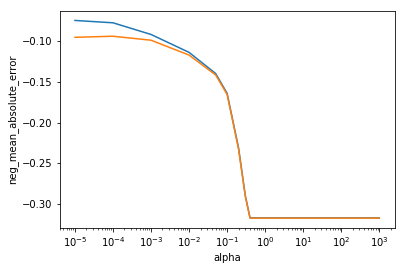

In [2079]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('neg_mean_absolute_error')
plt.xscale('log')
#plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### Assigning alpha value of 

In [2080]:
# model with optimal alpha
# lasso regression
lm = Lasso(alpha=.001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8837868514415099
0.869980450170454


In [2081]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.643),
 ('OverallQual', 0.111),
 ('OverallCond', 0.043),
 ('BsmtFinType1', -0.01),
 ('BsmtFinType2', -0.0),
 ('BsmtUnfSF', -0.034),
 ('TotalBsmtSF', 0.057),
 ('GrLivArea', 0.121),
 ('GarageCars', 0.068),
 ('MSZoning_FV', 0.124),
 ('MSZoning_RH', 0.019),
 ('MSZoning_RL', 0.111),
 ('LotShape_IR3', -0.006),
 ('LandContour_HLS', 0.048),
 ('LandContour_Low', 0.05),
 ('LandContour_Lvl', 0.031),
 ('Utilities_NoSeWa', -0.0),
 ('LotConfig_FR2', -0.0),
 ('LotConfig_FR3', -0.0),
 ('Neighborhood_BrDale', -0.0),
 ('Neighborhood_ClearCr', 0.103),
 ('Neighborhood_Crawfor', 0.077),
 ('Neighborhood_Edwards', -0.07),
 ('Neighborhood_MeadowV', -0.004),
 ('Neighborhood_NAmes', -0.012),
 ('Neighborhood_NoRidge', 0.043),
 ('Neighborhood_NridgHt', 0.083),
 ('Neighborhood_OldTown', -0.033),
 ('Neighborhood_StoneBr', 0.0),
 ('Neighborhood_Veenker', 0.0),
 ('Condition1_Norm', 0.065),
 ('Condition1_PosA', 0.0),
 ('Condition1_PosN', -0.0),
 ('Condition1_RRNn', 0.0),
 ('Condition2_Feedr', -0.0),
 (

### RFE after Lasso regression

In [2082]:

X_train_lasso = X_train[[  'MSZoning_FV',
 'GrLivArea', 'OverallQual', 'MSZoning_RL', 'Neighborhood_ClearCr', 'CentralAir_Y', 'Neighborhood_NridgHt', 
'Neighborhood_Crawfor', 'Exterior1st_BrkFace', 'GarageCars', 'Condition1_Norm', 'TotalBsmtSF', 'SaleType_New', 
'LandContour_Low', 'LandContour_HLS', 'OverallCond', 'Neighborhood_NoRidge', 'Foundation_PConc',
 'GarageType_Attchd', 'SaleCondition_Normal', 'Functional_Typ', 'LandContour_Lvl', 'Exterior2nd_VinylSd',
 'MSZoning_RH', 'SaleCondition_Partial', 'RoofMatl_CompShg', 'Exterior1st_MetalSd', 'GarageCond_TA'
]]


In [2083]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train_lasso, y_train)

In [2084]:
list(zip(X_train_lasso.columns,rfe.support_,rfe.ranking_))


[('MSZoning_FV', True, 1),
 ('GrLivArea', True, 1),
 ('OverallQual', True, 1),
 ('MSZoning_RL', True, 1),
 ('Neighborhood_ClearCr', True, 1),
 ('CentralAir_Y', True, 1),
 ('Neighborhood_NridgHt', True, 1),
 ('Neighborhood_Crawfor', False, 4),
 ('Exterior1st_BrkFace', False, 6),
 ('GarageCars', False, 11),
 ('Condition1_Norm', False, 9),
 ('TotalBsmtSF', False, 16),
 ('SaleType_New', False, 12),
 ('LandContour_Low', True, 1),
 ('LandContour_HLS', True, 1),
 ('OverallCond', False, 15),
 ('Neighborhood_NoRidge', True, 1),
 ('Foundation_PConc', False, 14),
 ('GarageType_Attchd', False, 5),
 ('SaleCondition_Normal', False, 10),
 ('Functional_Typ', False, 7),
 ('LandContour_Lvl', False, 2),
 ('Exterior2nd_VinylSd', False, 18),
 ('MSZoning_RH', False, 3),
 ('SaleCondition_Partial', False, 8),
 ('RoofMatl_CompShg', False, 13),
 ('Exterior1st_MetalSd', False, 19),
 ('GarageCond_TA', False, 17)]

In [2085]:
col = X_train_lasso.columns[rfe.support_]
col


Index(['MSZoning_FV', 'GrLivArea', 'OverallQual', 'MSZoning_RL', 'Neighborhood_ClearCr', 'CentralAir_Y', 'Neighborhood_NridgHt', 'LandContour_Low', 'LandContour_HLS', 'Neighborhood_NoRidge'], dtype='object')

In [2086]:
X_train_lasso = X_train[[ 'MSZoning_FV', 'GrLivArea', 'OverallQual', 'MSZoning_RL', 'Neighborhood_ClearCr', 
                         'CentralAir_Y', 'Neighborhood_NridgHt', 'LandContour_Low', 'LandContour_HLS', 'Neighborhood_NoRidge']]

# Adding a constant variable 
#import statsmodels.api as sm  
X_train_lasso_lm = sm.add_constant(X_train_lasso)
lm_1 = sm.OLS(y_train,X_train_lasso_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     418.6
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        16:35:54   Log-Likelihood:                 303.71
No. Observations:                1021   AIC:                            -585.4
Df Residuals:                    1010   BIC:                            -531.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.6436 

In [2087]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
C = X_train_lasso
vif['Features'] = C.columns
vif['VIF'] = [variance_inflation_factor(C.values, i) for i in range(C.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5          CentralAir_Y  5.80
3           MSZoning_RL  5.56
2           OverallQual  1.90
1             GrLivArea  1.67
0           MSZoning_FV  1.33
6  Neighborhood_NridgHt  1.31
7       LandContour_Low  1.28
4  Neighborhood_ClearCr  1.27
9  Neighborhood_NoRidge  1.19
8       LandContour_HLS  1.07

In [2088]:
X_train_lasso = X_train_lasso.drop(["CentralAir_Y"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lasso_lm = sm.add_constant(X_train_lasso)

lm_2 = sm.OLS(y_train,X_train_lasso_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     419.0
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        16:36:09   Log-Likelihood:                 260.76
No. Observations:                1021   AIC:                            -501.5
Df Residuals:                    1011   BIC:                            -452.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.8232 

In [2089]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
C = X_train_lasso
vif['Features'] = C.columns
vif['VIF'] = [variance_inflation_factor(C.values, i) for i in range(C.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2           OverallQual  1.90
1             GrLivArea  1.67
5  Neighborhood_NridgHt  1.31
6       LandContour_Low  1.28
4  Neighborhood_ClearCr  1.27
3           MSZoning_RL  1.22
8  Neighborhood_NoRidge  1.19
7       LandContour_HLS  1.07
0           MSZoning_FV  1.04

# Ridge

In [2090]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)  

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [2091]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0       0.019390      0.008222         0.001805    1.833532e-03      0.0001  {'alpha': 0.0001}          -0.071581          -0.106676          -0.117825          -0.095232          -0.086789        -0.095597        0.015955               21           -0.077888           -0.072941           -0.069911           -0.076258           -0.074740         -0.074347         0.002757
1       0.019392      0.012196         0.001420    3.800214e-04       0.001   {'alpha': 0.001}          -0.071549          -0.106578          -0.117626          -0.095226          -0.086845        -0.095541        0.015890               19           -0.077951           -0.072969           -0.069945           -0.076261           -0.074794         -0.074384         0.002761
2       0.013503      0.007882         0.001016    9.368364e-07        0.01    {'alpha': 0.01}          -0.071403          -0.105716          -0.115902          -0.095162          -0.087569        -0.095127        0.015266               12           -0.078582           -0.073366           -0.070331           -0.076285           -0.075376         -0.074788         0.002788
3       0.008936      0.000759         0.001116    2.038082e-04        0.05    {'alpha': 0.05}          -0.072666          -0.103737          -0.112237          -0.094892          -0.089991        -0.094683        0.013405                1           -0.080824           -0.075234           -0.072198           -0.076402           -0.077451         -0.076422         0.002818
4       0.009548      0.001883         0.001116    2.039523e-04         0.1     {'alpha': 0.1}          -0.074016          -0.102965          -0.110541          -0.094581          -0.091814        -0.094763        0.012302                2           -0.082613           -0.077052           -0.074027           -0.076549           -0.079323         -0.077913         0.002891

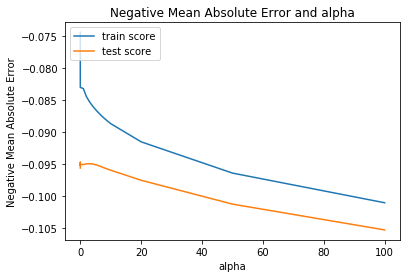

In [2092]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### Assigning the alpha value of 

In [2093]:
alpha = 10
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_


array([ 0.10194266,  0.04204472, -0.00370398, -0.00370398, -0.03383944,
        0.05553186,  0.12309771,  0.06433965,  0.10832893,  0.05900252,
        0.09735242, -0.05750132,  0.07748891,  0.0823581 ,  0.05237199,
       -0.00870785, -0.0160843 , -0.01003193, -0.04972277,  0.10503437,
        0.09007185, -0.07788127, -0.07070574, -0.01945483,  0.06493855,
        0.08329507, -0.04601339,  0.03625541,  0.04953309,  0.06563842,
        0.03383701, -0.00939386,  0.0293833 ,  0.01553824,  0.04819037,
        0.02148065, -0.09271771,  0.01345259, -0.03258477, -0.02216896,
        0.05313934,  0.00989975,  0.00544702,  0.00555221,  0.02896526,
        0.02094931,  0.05075098, -0.02902092,  0.08621859, -0.00929683,
        0.02326786,  0.02682695,  0.02359845, -0.05499671,  0.03444363,
        0.01241004, -0.00929683,  0.02946108,  0.04689636,  0.01089983,
       -0.0435098 ,  0.043065  , -0.02319735,  0.01619798,  0.06277567,
       -0.00707759, -0.00164023, -0.05926616, -0.04596509, -0.01

In [2094]:
lm = Ridge(alpha=10)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8945440628205079
0.8719782962459395


In [2017]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.519),
 ('OverallQual', 0.102),
 ('OverallCond', 0.042),
 ('BsmtFinType1', -0.004),
 ('BsmtFinType2', -0.004),
 ('BsmtUnfSF', -0.034),
 ('TotalBsmtSF', 0.056),
 ('GrLivArea', 0.123),
 ('GarageCars', 0.064),
 ('MSZoning_FV', 0.108),
 ('MSZoning_RH', 0.059),
 ('MSZoning_RL', 0.097),
 ('LotShape_IR3', -0.058),
 ('LandContour_HLS', 0.077),
 ('LandContour_Low', 0.082),
 ('LandContour_Lvl', 0.052),
 ('Utilities_NoSeWa', -0.009),
 ('LotConfig_FR2', -0.016),
 ('LotConfig_FR3', -0.01),
 ('Neighborhood_BrDale', -0.05),
 ('Neighborhood_ClearCr', 0.105),
 ('Neighborhood_Crawfor', 0.09),
 ('Neighborhood_Edwards', -0.078),
 ('Neighborhood_MeadowV', -0.071),
 ('Neighborhood_NAmes', -0.019),
 ('Neighborhood_NoRidge', 0.065),
 ('Neighborhood_NridgHt', 0.083),
 ('Neighborhood_OldTown', -0.046),
 ('Neighborhood_StoneBr', 0.036),
 ('Neighborhood_Veenker', 0.05),
 ('Condition1_Norm', 0.066),
 ('Condition1_PosA', 0.034),
 ('Condition1_PosN', -0.009),
 ('Condition1_RRNn', 0.029),
 ('Condition

### RFE after ridge regression

In [2018]:
X_train_new = X_train[[ 'GrLivArea', 'MSZoning_FV', 'Neighborhood_ClearCr', 'OverallQual', 'MSZoning_RL',
 'Neighborhood_Crawfor', 'Exterior1st_BrkFace', 'Neighborhood_NridgHt', 'LandContour_Low', 'CentralAir_Y', 'LandContour_HLS', 'Condition1_Norm',
 'Neighborhood_NoRidge', 'GarageCars', 'Heating_GasW', 'MSZoning_RH', 'SaleCondition_Normal', 'TotalBsmtSF', 'RoofMatl_CompShg',
 'LandContour_Lvl', 'RoofMatl_WdShngl', 'Functional_Typ', 'Neighborhood_Veenker', 'Condition2_Norm', 'Exterior2nd_VinylSd', 'SaleType_New', 'SaleCondition_Partial',
 'GarageType_Attchd', 'Foundation_PConc' ,'OverallCond', 'Neighborhood_StoneBr', 'Condition1_PosA','Exterior1st_WdShing',
 'Condition1_RRNn', 'RoofMatl_Tar&Grv', 'Exterior2nd_CmentBd', 'GarageQual_Gd', 'Exterior1st_MetalSd',
 'Exterior1st_Plywood', 'Exterior1st_HdBoard', 'Functional_Min1', 'SaleType_ConLD', 'Condition2_PosA', 'RoofMatl_WdShake',
 'SaleCondition_AdjLand', 'SaleType_Con', 'Condition2_Feedr', 'Heating_GasA', 'GarageType_Basment', 'GarageCond_TA',
 'Condition2_RRNn', 'Exterior2nd_AsphShn', 'Exterior2nd_Wd Sdng', 'RoofMatl_Membran', 'GarageQual_Po', 'RoofMatl_Roll',
 'RoofMatl_Metal', 'GarageType_NoGarage', 'GarageFinish_NoGarage', 'GarageQual_NoGarage', 'GarageCond_NoGarage',
 'GarageCond_Po', 'GarageQual_TA', 'SaleType_ConLI'
]]



In [2019]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train_new, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train_new, y_train)

In [2022]:
list(zip(X_train_new.columns,rfe.support_,rfe.ranking_))

[('GrLivArea', False, 5),
 ('MSZoning_FV', True, 1),
 ('Neighborhood_ClearCr', True, 1),
 ('OverallQual', True, 1),
 ('MSZoning_RL', True, 1),
 ('Neighborhood_Crawfor', False, 11),
 ('Exterior1st_BrkFace', False, 29),
 ('Neighborhood_NridgHt', False, 6),
 ('LandContour_Low', False, 14),
 ('CentralAir_Y', False, 3),
 ('LandContour_HLS', False, 15),
 ('Condition1_Norm', False, 28),
 ('Neighborhood_NoRidge', False, 10),
 ('GarageCars', False, 30),
 ('Heating_GasW', False, 27),
 ('MSZoning_RH', False, 13),
 ('SaleCondition_Normal', False, 19),
 ('TotalBsmtSF', False, 23),
 ('RoofMatl_CompShg', True, 1),
 ('LandContour_Lvl', False, 16),
 ('RoofMatl_WdShngl', True, 1),
 ('Functional_Typ', False, 17),
 ('Neighborhood_Veenker', False, 4),
 ('Condition2_Norm', True, 1),
 ('Exterior2nd_VinylSd', False, 40),
 ('SaleType_New', False, 18),
 ('SaleCondition_Partial', False, 9),
 ('GarageType_Attchd', False, 35),
 ('Foundation_PConc', False, 26),
 ('OverallCond', False, 34),
 ('Neighborhood_StoneBr',

In [2023]:
col = X_train_new.columns[rfe.support_]
col

Index(['MSZoning_FV', 'Neighborhood_ClearCr', 'OverallQual', 'MSZoning_RL', 'RoofMatl_CompShg', 'RoofMatl_WdShngl', 'Condition2_Norm', 'RoofMatl_Tar&Grv', 'Condition2_PosA', 'RoofMatl_WdShake', 'Condition2_Feedr', 'Condition2_RRNn', 'RoofMatl_Membran', 'RoofMatl_Roll', 'RoofMatl_Metal'], dtype='object')

### Building model with OLS

In [2024]:
X_train_new = X_train[[ 'MSZoning_FV', 'Neighborhood_ClearCr', 'OverallQual', 'MSZoning_RL', 'RoofMatl_CompShg',
                       'RoofMatl_WdShngl', 'Condition2_Norm', 'RoofMatl_Tar&Grv', 'Condition2_PosA', 'RoofMatl_WdShake', 
                       'Condition2_Feedr', 'Condition2_RRNn', 'RoofMatl_Membran', 'RoofMatl_Roll', 'RoofMatl_Metal']]

# Adding a constant variable 
#import statsmodels.api as sm  
X_train_new_lm = sm.add_constant(X_train_new)
lm_1 = sm.OLS(y_train,X_train_new_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     180.0
Date:                Sun, 07 Jul 2019   Prob (F-statistic):          4.62e-272
Time:                        20:37:22   Log-Likelihood:                 133.61
No. Observations:                1021   AIC:                            -235.2
Df Residuals:                    1005   BIC:                            -156.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   10.5424 

In [2025]:
X_train_new = X_train_new.drop(["Condition2_PosA"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm_2 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     192.7
Date:                Sun, 07 Jul 2019   Prob (F-statistic):          7.17e-273
Time:                        20:37:34   Log-Likelihood:                 132.80
No. Observations:                1021   AIC:                            -235.6
Df Residuals:                    1006   BIC:                            -161.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   10.6201 

In [2026]:
X_train_new = X_train_new.drop(["Condition2_Feedr"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm_3 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     207.4
Date:                Sun, 07 Jul 2019   Prob (F-statistic):          8.09e-274
Time:                        20:37:41   Log-Likelihood:                 132.29
No. Observations:                1021   AIC:                            -236.6
Df Residuals:                    1007   BIC:                            -167.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   10.7038 

In [2027]:
X_train_new = X_train_new.drop(["Condition2_RRNn"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm_4 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     224.3
Date:                Sun, 07 Jul 2019   Prob (F-statistic):          1.47e-274
Time:                        20:37:50   Log-Likelihood:                 131.25
No. Observations:                1021   AIC:                            -236.5
Df Residuals:                    1008   BIC:                            -172.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   10.7379 

In [2028]:
#X_train_new = X_train_new.drop(['const'], axis=1)
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
B = X_train_new
vif['Features'] = B.columns
vif['VIF'] = [variance_inflation_factor(B.values, i) for i in range(B.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
6        Condition2_Norm  94.03
4       RoofMatl_CompShg  92.49
3            MSZoning_RL   6.01
7       RoofMatl_Tar&Grv   1.69
5       RoofMatl_WdShngl   1.40
8       RoofMatl_WdShake   1.39
0            MSZoning_FV   1.36
1   Neighborhood_ClearCr   1.21
9       RoofMatl_Membran   1.16
11        RoofMatl_Metal   1.16
2            OverallQual   1.10
10         RoofMatl_Roll   1.10

In [2029]:
X_train_new = X_train_new.drop(["Condition2_Norm"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm_5 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     243.3
Date:                Sun, 07 Jul 2019   Prob (F-statistic):          1.07e-274
Time:                        20:38:02   Log-Likelihood:                 128.75
No. Observations:                1021   AIC:                            -233.5
Df Residuals:                    1009   BIC:                            -174.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   10.8889 

In [2030]:
#X_train_new = X_train_new.drop(['const'], axis=1)
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
B = X_train_new
vif['Features'] = B.columns
vif['VIF'] = [variance_inflation_factor(B.values, i) for i in range(B.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4       RoofMatl_CompShg  6.05
3            MSZoning_RL  5.93
0            MSZoning_FV  1.35
1   Neighborhood_ClearCr  1.21
2            OverallQual  1.10
6       RoofMatl_Tar&Grv  1.09
8       RoofMatl_Membran  1.07
10        RoofMatl_Metal  1.07
5       RoofMatl_WdShngl  1.05
7       RoofMatl_WdShake  1.04
9          RoofMatl_Roll  1.01

In [2031]:
X_train_new = X_train_new.drop(["RoofMatl_CompShg"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm_6 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     260.9
Date:                Sun, 07 Jul 2019   Prob (F-statistic):          9.70e-272
Time:                        20:38:17   Log-Likelihood:                 118.99
No. Observations:                1021   AIC:                            -216.0
Df Residuals:                    1010   BIC:                            -161.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.8390 

In [2032]:
X_train_new = X_train_new.drop(["RoofMatl_Roll"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm_7 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     290.1
Date:                Sun, 07 Jul 2019   Prob (F-statistic):          5.54e-273
Time:                        20:38:26   Log-Likelihood:                 118.99
No. Observations:                1021   AIC:                            -218.0
Df Residuals:                    1011   BIC:                            -168.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.8390 

In [2033]:
X_train_new = X_train_new.drop(["RoofMatl_Tar&Grv"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm_8 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     326.7
Date:                Sun, 07 Jul 2019   Prob (F-statistic):          3.06e-274
Time:                        20:38:31   Log-Likelihood:                 118.96
No. Observations:                1021   AIC:                            -219.9
Df Residuals:                    1012   BIC:                            -175.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.8390 

In [2034]:
X_train_new = X_train_new.drop(["RoofMatl_WdShake"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm_9 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     373.7
Date:                Sun, 07 Jul 2019   Prob (F-statistic):          1.56e-275
Time:                        20:38:39   Log-Likelihood:                 118.93
No. Observations:                1021   AIC:                            -221.9
Df Residuals:                    1013   BIC:                            -182.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.8390 

In [2035]:
X_train_new = X_train_new.drop(["RoofMatl_Membran"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm_10 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     436.3
Date:                Sun, 07 Jul 2019   Prob (F-statistic):          7.99e-277
Time:                        20:38:52   Log-Likelihood:                 118.82
No. Observations:                1021   AIC:                            -223.6
Df Residuals:                    1014   BIC:                            -189.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.8390 

In [2036]:
X_train_new = X_train_new.drop(["RoofMatl_Metal"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm_11 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_11.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     523.7
Date:                Sun, 07 Jul 2019   Prob (F-statistic):          4.45e-278
Time:                        20:38:59   Log-Likelihood:                 118.53
No. Observations:                1021   AIC:                            -225.1
Df Residuals:                    1015   BIC:                            -195.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.8390 

In [2037]:
#X_train_new = X_train_new.drop(['const'], axis=1)
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
B = X_train_new
vif['Features'] = B.columns
vif['VIF'] = [variance_inflation_factor(B.values, i) for i in range(B.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1  Neighborhood_ClearCr  1.04
2           OverallQual  1.04
0           MSZoning_FV  1.03
3           MSZoning_RL  1.03
4      RoofMatl_WdShngl  1.03

# Results:


##        Lasso :
#### Optimal alpha :   0.001
#### Adjusted R2  :    Train data- 0.88378651 and  Test data-  0.869980
### After  RFE 
##### Variables- OverallQual, GrLivArea, Neighborhood_NridgHt, LandContour_Low, Neighborhood_ClearCr,MSZoning_RL,Neighborhood_NoRidge,LandContour_HLS,MSZoning_FV
##### Adj. R-squared :  0.787
##### AIC ---> -501.5
##### BIC ----> -452.2




##        Ridge :
#### Optimal alpha : 10
#### Adjusted R2  
####             Test data- 0.8945440 Train data-  0.87197
## After  RFE 
##### Variables - Neighborhood_ClearCr, OverallQual,MSZoning_FV,MSZoning_RL and RoofMatl_WdShng
##### Adj. R-squared --> 0.719
##### AIC ---> -225.1
##### BIC ----> -195.5





# Lasso model is prefered as the Adjustesd R2 is better and BIC & AIC score is less.